In [1]:
import pandas as pd
import os

import statistics
import numpy as np


In [2]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 200
inputFolders = "result_smote_epoch_1_rounds_200/"

In [3]:
file = inputFolders+"global_model_MLP_metrics.csv" # local_model_results_MLP_unbalanced_client_0_round_1

dataGeral = pd.read_csv(file)

dataGeral

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.638896,awake,0.703814,0.707504,0.990743,0.825504,0.002412,0.500865,[[ 434 39069][ 883 94502]],434.0,39069.0,883.0,94502.0
1,-1,0,0.638896,asleep,0.703814,0.329537,0.010987,0.021264,0.002412,0.500865,[[ 94502 883][ 39069 434]],94502.0,883.0,39069.0,434.0
2,-1,0,0.638896,avg,0.703814,0.518520,0.500865,0.423384,0.002412,0.500865,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.609412,awake,0.701738,0.711627,0.972165,0.821739,0.028232,0.510461,[[ 1926 37577][ 2655 92730]],1926.0,37577.0,2655.0,92730.0
4,-1,1,0.609412,asleep,0.701738,0.420432,0.048756,0.087379,0.028232,0.510461,[[ 92730 2655][ 37577 1926]],92730.0,2655.0,37577.0,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.677011,asleep,0.746968,0.601160,0.404071,0.483294,0.324180,0.646523,[[ 84795 10590][ 23541 15962]],84795.0,10590.0,23541.0,15962.0
599,-1,199,0.677011,avg,0.746968,0.691932,0.646523,0.657878,0.324180,0.646523,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.673810,awake,0.744499,0.778965,0.891713,0.831534,0.312766,0.640373,[[ 15368 24135][ 10329 85056]],15368.0,24135.0,10329.0,85056.0
601,-1,200,0.673810,asleep,0.744499,0.598046,0.389034,0.471411,0.312766,0.640373,[[ 85056 10329][ 24135 15368]],85056.0,10329.0,24135.0,15368.0


In [4]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
120,-1,40,0.590825,awake,0.749829,0.795222,0.870346,0.831090,0.352743,0.664586,[[ 18125 21378][ 12367 83018]],18125.0,21378.0,12367.0,83018.0
121,-1,40,0.590825,asleep,0.749829,0.594418,0.458826,0.517894,0.352743,0.664586,[[ 83018 12367][ 21378 18125]],83018.0,12367.0,21378.0,18125.0
122,-1,40,0.590825,avg,0.749829,0.694820,0.664586,0.674492,0.352743,0.664586,NaN,NaN,NaN,NaN,NaN


In [5]:
dataGeralFiltered = dataGeral[:(NUMBER_OF_ITERATIONS*3)+3]

dataGeralFiltered

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.638896,awake,0.703814,0.707504,0.990743,0.825504,0.002412,0.500865,[[ 434 39069][ 883 94502]],434.0,39069.0,883.0,94502.0
1,-1,0,0.638896,asleep,0.703814,0.329537,0.010987,0.021264,0.002412,0.500865,[[ 94502 883][ 39069 434]],94502.0,883.0,39069.0,434.0
2,-1,0,0.638896,avg,0.703814,0.518520,0.500865,0.423384,0.002412,0.500865,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.609412,awake,0.701738,0.711627,0.972165,0.821739,0.028232,0.510461,[[ 1926 37577][ 2655 92730]],1926.0,37577.0,2655.0,92730.0
4,-1,1,0.609412,asleep,0.701738,0.420432,0.048756,0.087379,0.028232,0.510461,[[ 92730 2655][ 37577 1926]],92730.0,2655.0,37577.0,1926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.677011,asleep,0.746968,0.601160,0.404071,0.483294,0.324180,0.646523,[[ 84795 10590][ 23541 15962]],84795.0,10590.0,23541.0,15962.0
599,-1,199,0.677011,avg,0.746968,0.691932,0.646523,0.657878,0.324180,0.646523,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.673810,awake,0.744499,0.778965,0.891713,0.831534,0.312766,0.640373,[[ 15368 24135][ 10329 85056]],15368.0,24135.0,10329.0,85056.0
601,-1,200,0.673810,asleep,0.744499,0.598046,0.389034,0.471411,0.312766,0.640373,[[ 85056 10329][ 24135 15368]],85056.0,10329.0,24135.0,15368.0


In [6]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
122,-1,40,0.590825,avg,0.749829,0.69482,0.664586,0.674492,0.352743,0.664586,NaN,NaN,NaN,NaN,NaN


In [7]:
dataGeralFiltered.loc[dataGeralFiltered['round'] == ss1['round'].max()]

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
120,-1,40,0.590825,awake,0.749829,0.795222,0.870346,0.831090,0.352743,0.664586,[[ 18125 21378][ 12367 83018]],18125.0,21378.0,12367.0,83018.0
121,-1,40,0.590825,asleep,0.749829,0.594418,0.458826,0.517894,0.352743,0.664586,[[ 83018 12367][ 21378 18125]],83018.0,12367.0,21378.0,18125.0
122,-1,40,0.590825,avg,0.749829,0.694820,0.664586,0.674492,0.352743,0.664586,NaN,NaN,NaN,NaN,NaN


In [8]:
allData = []

dataGeralFilteredAvg = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(1,NUMBER_OF_ITERATIONS+1):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"global_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
    # global accuracy local_model_results_MLP_client_0_round_0
    #file = inputFolders+"global_model_MLP_unbalanced_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    #dataF = pd.read_csv(file)
    accuracySeries = dataGeralFilteredAvg[iterationI:(iterationI+1)]['accuracy']
    global_accuracy = accuracySeries.values[0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

Round  1 Clients:  19
Round  2 Clients:  19
Round  3 Clients:  19
Round  4 Clients:  19
Round  5 Clients:  19
Round  6 Clients:  19
Round  7 Clients:  19
Round  8 Clients:  19
Round  9 Clients:  19
Round  10 Clients:  19
Round  11 Clients:  19
Round  12 Clients:  19
Round  13 Clients:  19
Round  14 Clients:  19
Round  15 Clients:  19
Round  16 Clients:  19
Round  17 Clients:  19
Round  18 Clients:  19
Round  19 Clients:  19
Round  20 Clients:  19
Round  21 Clients:  19
Round  22 Clients:  19
Round  23 Clients:  19
Round  24 Clients:  19
Round  25 Clients:  19
Round  26 Clients:  19
Round  27 Clients:  19
Round  28 Clients:  19
Round  29 Clients:  19
Round  30 Clients:  19
Round  31 Clients:  19
Round  32 Clients:  19
Round  33 Clients:  19
Round  34 Clients:  19
Round  35 Clients:  19
Round  36 Clients:  19
Round  37 Clients:  19
Round  38 Clients:  19
Round  39 Clients:  19
Round  40 Clients:  19
Round  41 Clients:  19
Round  42 Clients:  19
Round  43 Clients:  19
Round  44 Clients:  

In [9]:
itetarionAccuracy

[0.729360654765435,
 0.5941892533064468,
 0.7415633710930549,
 0.6246812170096673,
 0.7310880137595634,
 0.5749733111915071,
 0.6913216891050353,
 0.5907122946444457,
 0.686762350987486,
 0.7474274954035941,
 0.4564601743668821,
 0.7019601447126504,
 0.7185739279995256,
 0.6731732993298144,
 0.7463970108534488,
 0.41121523041338,
 0.7349578909910445,
 0.7209833343218077,
 0.7257131842713955]

In [10]:
max(itetarionAccuracy)

0.7474274954035941

In [11]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
120,-1,40,0.590825,awake,0.749829,0.795222,0.870346,0.831090,0.352743,0.664586,[[ 18125 21378][ 12367 83018]],18125.0,21378.0,12367.0,83018.0
121,-1,40,0.590825,asleep,0.749829,0.594418,0.458826,0.517894,0.352743,0.664586,[[ 83018 12367][ 21378 18125]],83018.0,12367.0,21378.0,18125.0
122,-1,40,0.590825,avg,0.749829,0.694820,0.664586,0.674492,0.352743,0.664586,NaN,NaN,NaN,NaN,NaN


In [12]:
x = ss[iterationI:(iterationI+1)]['accuracy']
x.values[0]

0.7444991400272819

In [13]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.313593,0.712458,0.701738,0.634909,0.694851,0.116147,19
0,2,0.325670,0.725357,0.720598,0.644243,0.699899,0.111981,19
0,3,0.332298,0.741474,0.719271,0.651620,0.701278,0.107293,19
0,4,0.341595,0.744173,0.730087,0.658786,0.704607,0.101679,19
0,5,0.332676,0.745255,0.733772,0.657457,0.707105,0.103543,19
...,...,...,...,...,...,...,...,...
0,196,0.407234,0.759645,0.745633,0.666356,0.704229,0.101330,19
0,197,0.411000,0.758370,0.745997,0.665080,0.705407,0.095427,19
0,198,0.384163,0.756865,0.746441,0.661606,0.704110,0.099830,19
0,199,0.398034,0.759460,0.746968,0.664168,0.699958,0.097779,19


In [14]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,200,0.411215,0.747427,0.744499,0.70196,0.663238,0.095442,19


In [15]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.313593,0.712458,0.701738,0.634909,0.694851,0.116147,19
0,2,0.325670,0.725357,0.720598,0.644243,0.699899,0.111981,19
0,3,0.332298,0.741474,0.719271,0.651620,0.701278,0.107293,19
0,4,0.341595,0.744173,0.730087,0.658786,0.704607,0.101679,19
0,5,0.332676,0.745255,0.733772,0.657457,0.707105,0.103543,19
...,...,...,...,...,...,...,...,...
0,196,0.407234,0.759645,0.745633,0.666356,0.704229,0.101330,19
0,197,0.411000,0.758370,0.745997,0.665080,0.705407,0.095427,19
0,198,0.384163,0.756865,0.746441,0.661606,0.704110,0.099830,19
0,199,0.398034,0.759460,0.746968,0.664168,0.699958,0.097779,19


In [16]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.7498294881679616
local accuracy 0.7632702686673388


In [17]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='round'>

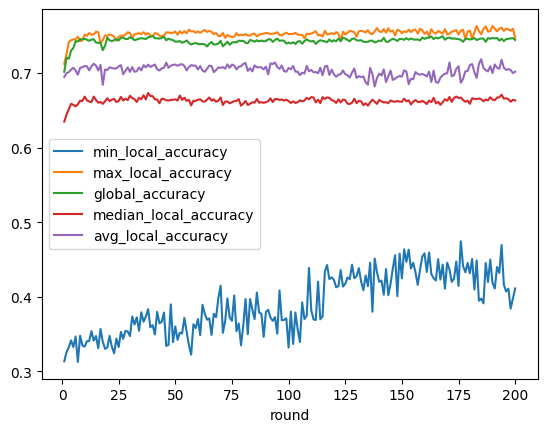

In [18]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [19]:
lines.figure.savefig('metrics_flower_isabela_smote_fix.pdf')